<h2>Instrucciones del proyecto</h2>


* Llevar a cabo el análisis exploratorio de datos (EDA)
    * Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).
    * Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).
    * Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
Crea una matriz de correlación y muéstrala.

* Construir un modelo para predecir la cancelación de usuarios.Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

    * Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
    * Entrena el modelo en el set de entrenamiento con dos métodos:
        * regresión logística;
        * bosque aleatorio.
    * Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?


* Crear clústeres de usuarios/as
Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

    * Estandariza los datos.
    * Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.
    * Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)
    * Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?
    * Traza distribuciones de características para los clústeres. ¿Notas algo?
    * Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?
      
* Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

In [1]:
#Cargar  librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

<h2>Paso 1. Descargar los datos</h2>

In [2]:
fintes = pd.read_csv('/datasets/gym_churn_us.csv')

<h2>Llevar a cabo el análisis exploratorio de datos (EDA)</h2>

In [3]:
fintes.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<P>No se muestra alguna categoria ausente, al usar describe en el dataFrame</P>

In [4]:

fintes_group=fintes.groupby(by='Churn')
fintes_group.describe()


gender                                              Near_Location  \
        count      mean       std  min  25%  50%  75%  max         count   
Churn                                                                      
0      2939.0  0.510037  0.499984  0.0  0.0  1.0  1.0  1.0        2939.0   
1      1061.0  0.510839  0.500118  0.0  0.0  1.0  1.0  1.0        1061.0   

                 ... Avg_class_frequency_total            \
           mean  ...                       75%       max   
Churn            ...                                       
0      0.873086  ...                  2.732944  6.023668   
1      0.768143  ...                  1.956438  3.478646   

      Avg_class_frequency_current_month                                     \
                                  count      mean       std  min       25%   
Churn                                                                        
0                                2939.0  2.027882  1.018994  0.0  1.297021   
1                                1061.0  1.044546  0.770237  0.0  0.421337   

                                     
            50%       75%       max  
Churn                                
0      2.046697  2.740648  6.146783  
1      0.979445  1.588576  3.540271  

[2 rows x 104 columns]

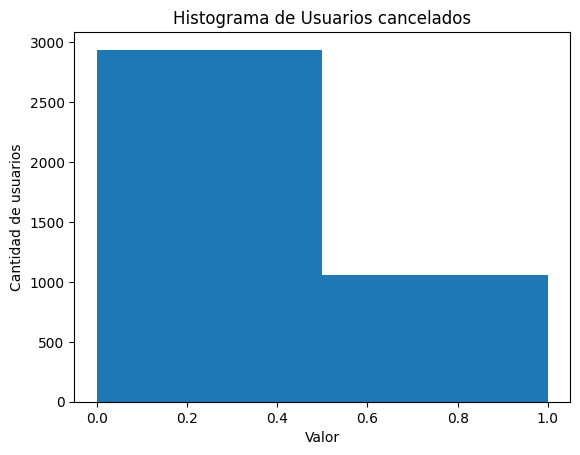

In [5]:
plt.hist(fintes['Churn'], bins=2)
# Agregar título y etiquetas
plt.title("Histograma de Usuarios cancelados")
plt.xlabel("Valor")
plt.ylabel("Cantidad de usuarios")

# Mostrar el gráfico
plt.show()

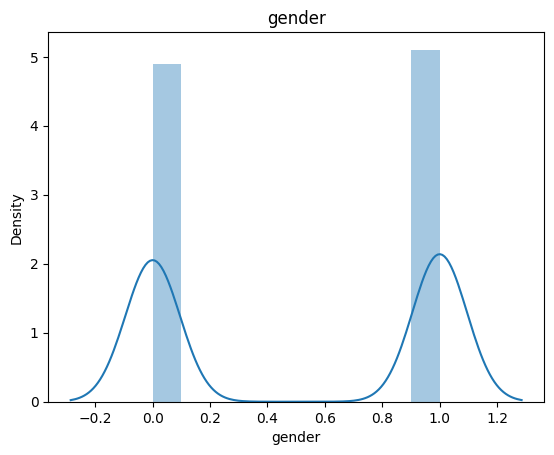

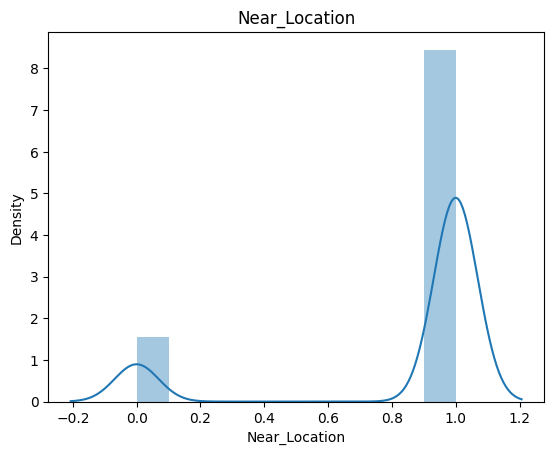

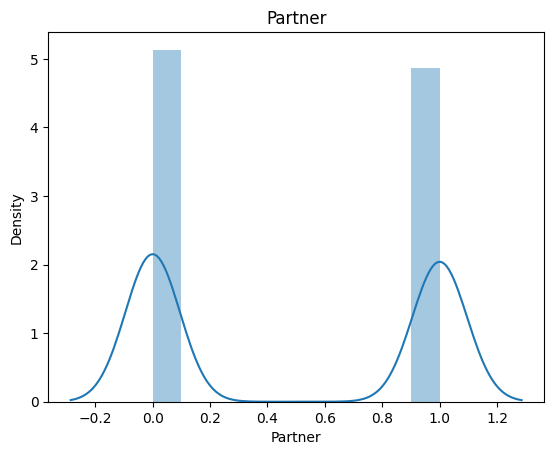

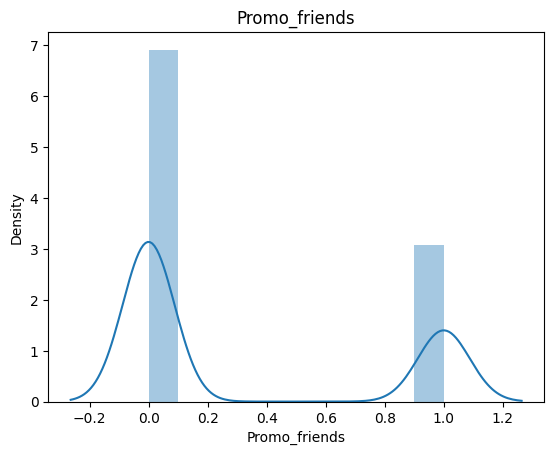

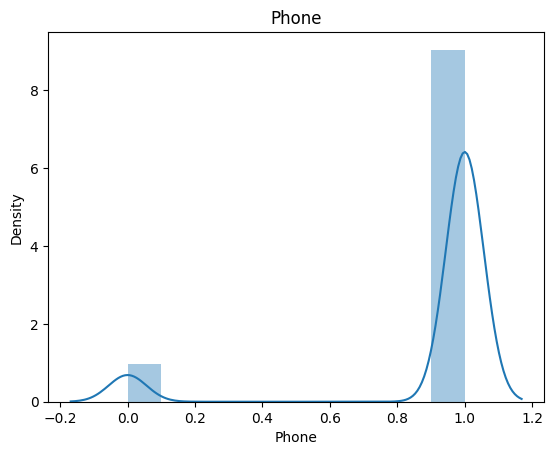

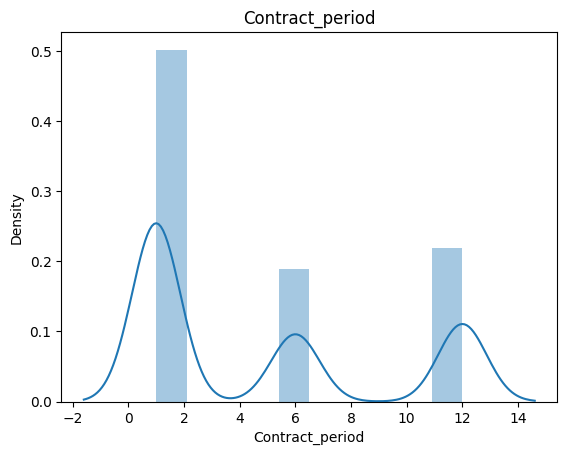

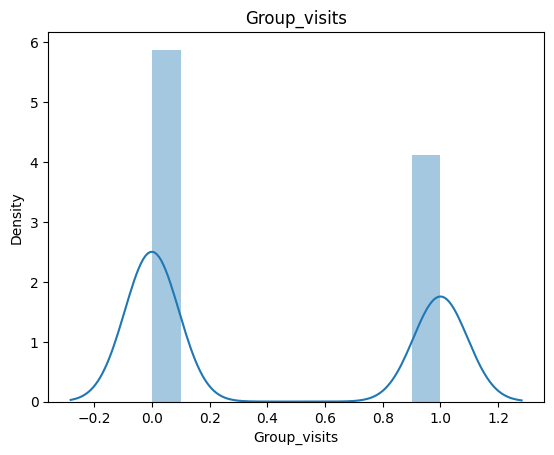

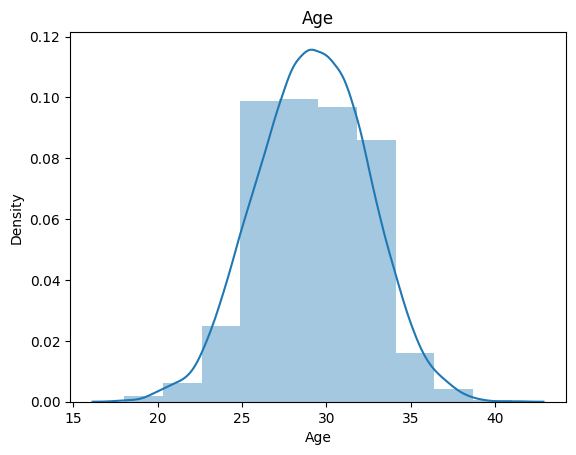

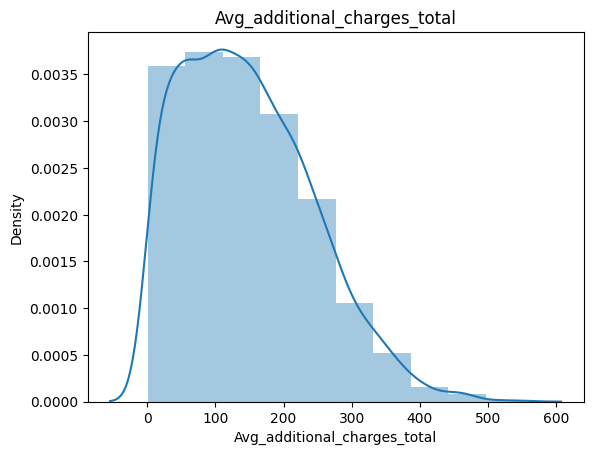

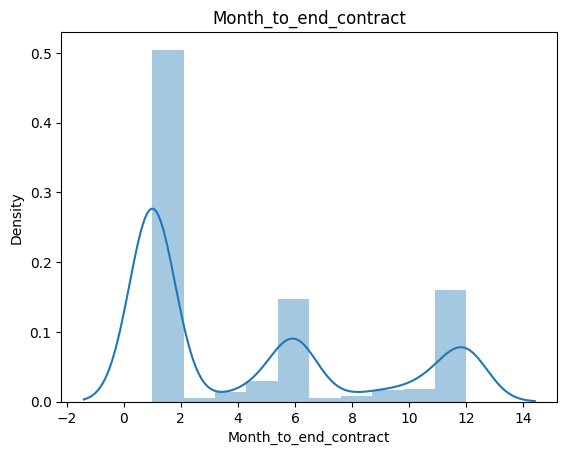

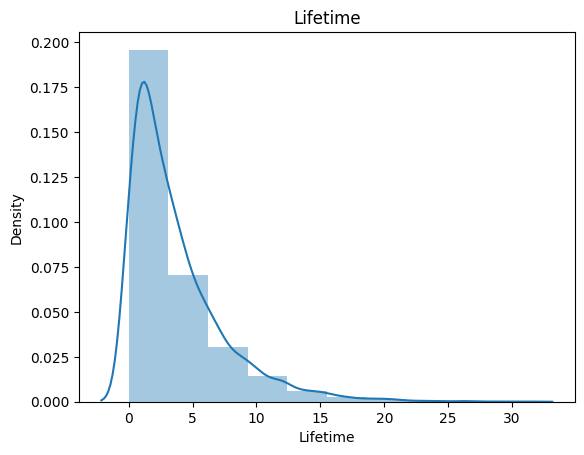

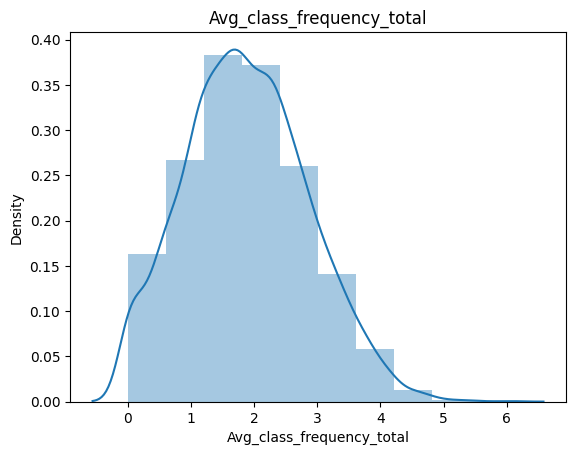

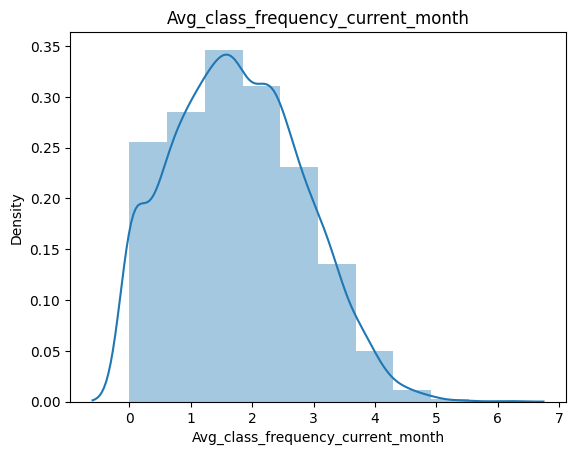

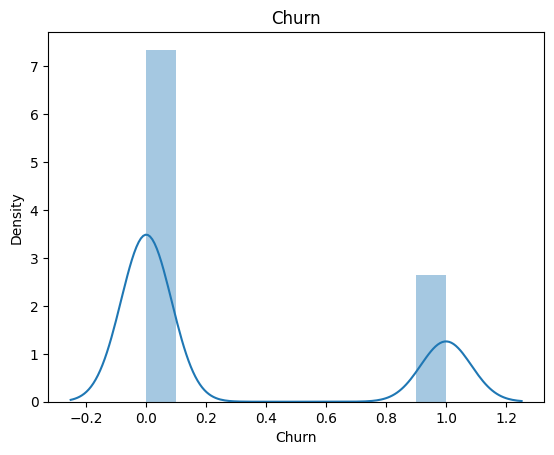

In [6]:

for feature in fintes.columns:
    sns.distplot(fintes[feature], bins = 10)
    plt.title(feature)
    plt.show()

<P>Las graficas se muestran en dos tipos unas que se hacercan a una distribucion normal, y las otras que toman algun valor</P>

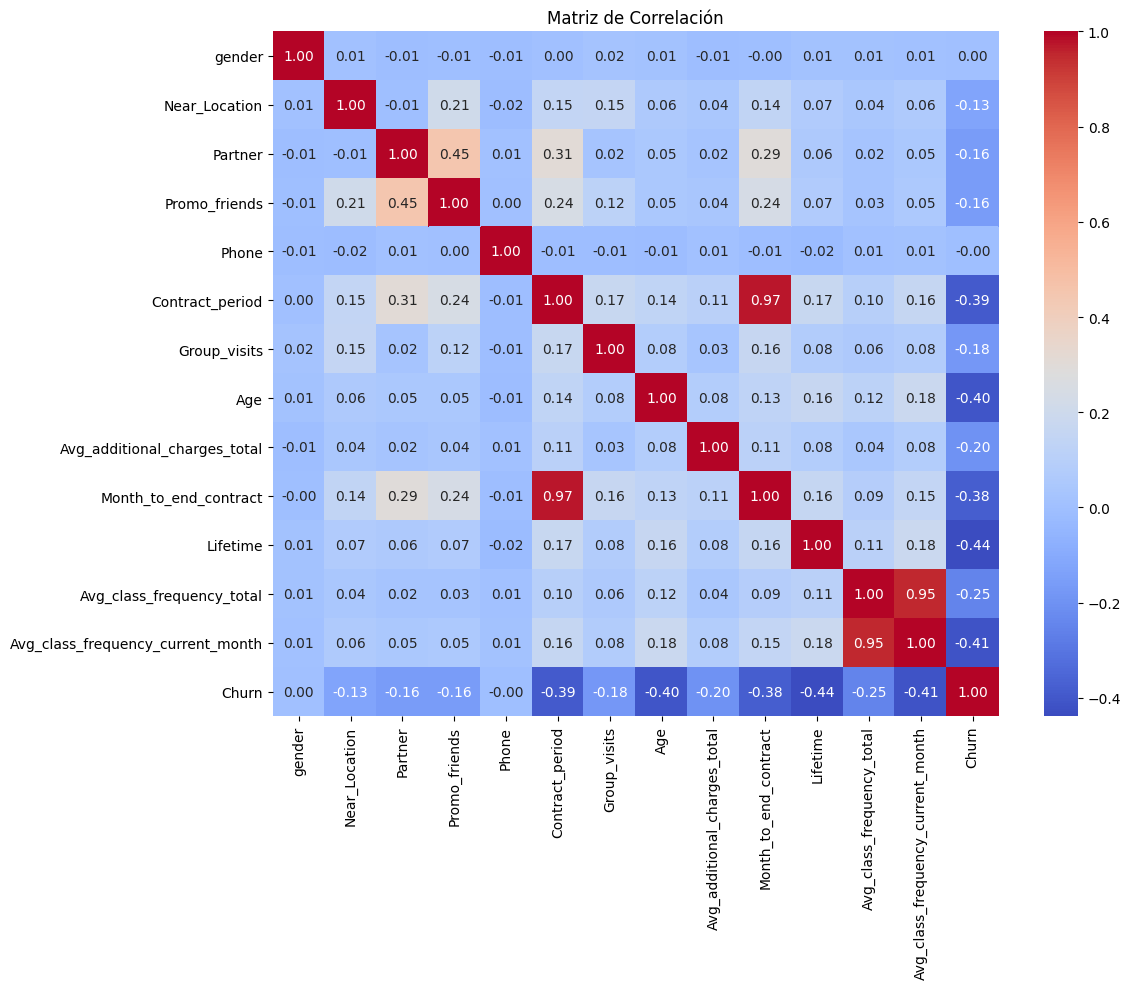

In [7]:
corr_fintes=fintes.corr()

# Crear una figura más grande
plt.figure(figsize=(12, 10))

# Crear el heatmap con mejor formato
sns.heatmap(corr_fintes, 
            annot=True,                    # Mostrar los valores
            cmap="coolwarm",               # Colores azul-rojo
            fmt=".2f",                     # Formato de 2 decimales
            xticklabels=fintes.columns,    # Nombres en eje X
            yticklabels=fintes.columns)    # Nombres en eje Y

# Añadir título
plt.title("Matriz de Correlación")

# Ajustar el layout para que se vea bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h2>Paso 3. Construir un modelo para predecir la cancelación de usuarios</h2>

In [8]:
# declara la lista de modelos
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)

    print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Precisión: {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
    print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
    
models = [LogisticRegression(),DecisionTreeClassifier()]
X = fintes.drop('Churn', axis = 1)
y = fintes['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for i in models:
    print(i)
    make_prediction(m=i,X_train = X_train, y_train= y_train,
                    X_test=X_test, y_test = y_test)

LogisticRegression()
,Exactitud: 0.91
,Precisión: 0.82
,Recall: 0.80
,F1: 0.81
,DecisionTreeClassifier()
,Exactitud: 0.90
,Precisión: 0.78
,Recall: 0.83
,F1: 0.80


/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
,STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
,
,Increase the number of iterations (max_iter) or scale the data as shown in:
,    https://scikit-learn.org/stable/modules/preprocessing.html
,Please also refer to the documentation for alternative solver options:
,    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
,  n_iter_i = _check_optimize_result(


<P>En particular las diferencias en ambos modelos.</P>
<P>En LogisticRegression() vemos que la precision es mayor que Recall y en el caso de DecisionTreeClassifier() es lo contrario es mayor el Racall que la precision.</P>

<h2>Paso 4. Crear clústeres de usuarios/as</h2>

In [15]:
usu_fitnes=fintes[['Contract_period','Month_to_end_contract','Group_visits','Avg_class_frequency_total','Avg_class_frequency_current_month','Avg_additional_charges_total','Churn']]
usu_fitnes.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 4000 entries, 0 to 3999
,Data columns (total 7 columns):
, #   Column                             Non-Null Count  Dtype  
,---  ------                             --------------  -----  
, 0   Contract_period                    4000 non-null   int64  
, 1   Month_to_end_contract              4000 non-null   float64
, 2   Group_visits                       4000 non-null   int64  
, 3   Avg_class_frequency_total          4000 non-null   float64
, 4   Avg_class_frequency_current_month  4000 non-null   float64
, 5   Avg_additional_charges_total       4000 non-null   float64
, 6   Churn                              4000 non-null   int64  
,dtypes: float64(4), int64(3)
,memory usage: 218.9 KB


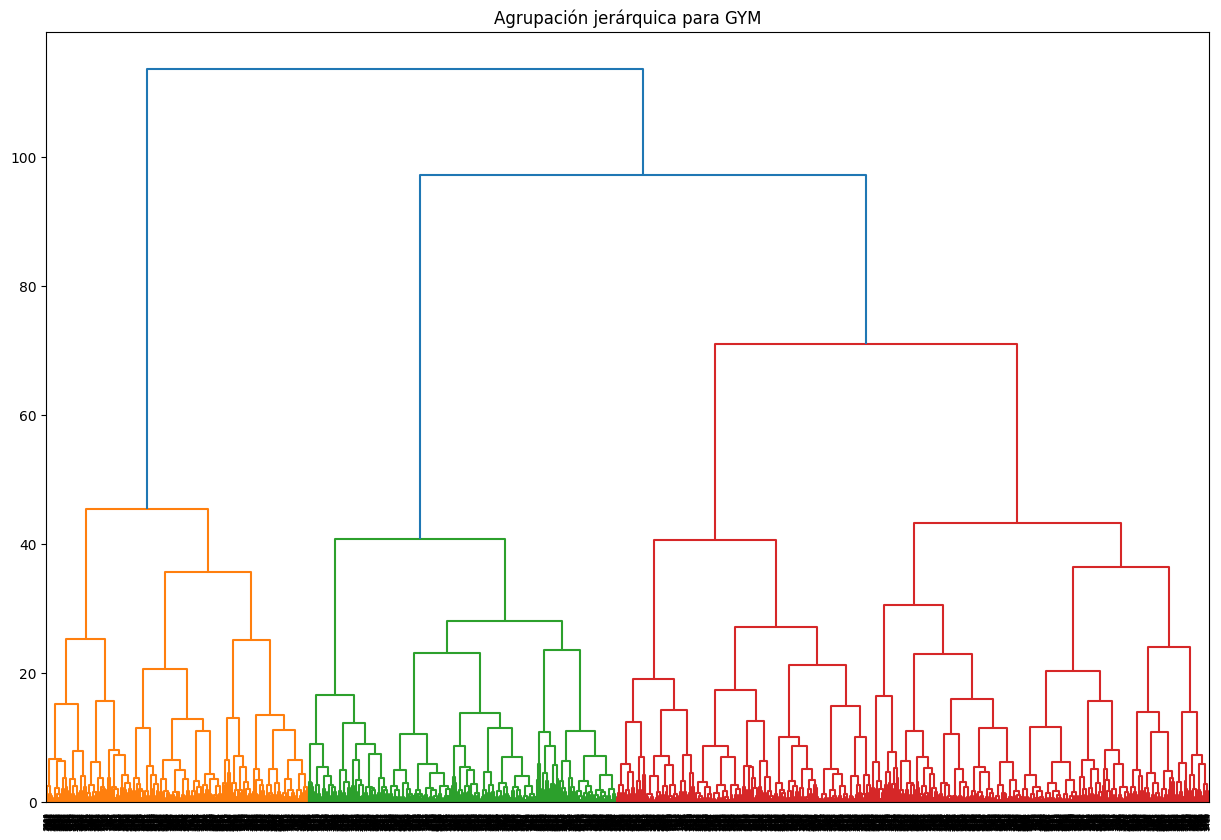

In [16]:

sc = StandardScaler()
X_sc = sc.fit_transform(usu_fitnes)

linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()


In [17]:
# la estandarización de datos obligatoria antes de pasarlo al algoritmo
sc = StandardScaler()
X_sc = sc.fit_transform(usu_fitnes)

km = KMeans(n_clusters = 5) # establecer el número de clústeres en 5
labels = km.fit_predict(X_sc) 


# almacena etiquetas de clúster en el campo de nuestro conjunto de datos
usu_fitnes['cluster_km'] = labels

# obtiene las estadísticas de los valores medios de las características por clúster
usu_fitnes.groupby(['cluster_km']).mean()



/tmp/ipykernel_72/865075358.py:10: SettingWithCopyWarning: 
,A value is trying to be set on a copy of a slice from a DataFrame.
,Try using .loc[row_indexer,col_indexer] = value instead
,
,See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
,  usu_fitnes['cluster_km'] = labels


,Contract_period,Month_to_end_contract,Group_visits,Avg_class_frequency_total,Avg_class_frequency_current_month,Avg_additional_charges_total,Churn
cluster_km,,,,,,,
0,1.507797,1.460039,0.266082,1.453413,1.016245,114.617751,1.000000
1,10.338129,9.573741,0.712230,1.061895,1.053842,165.824572,0.026978
2,2.805986,2.693498,0.468524,2.889875,2.899675,158.395263,0.013416
3,12.000000,10.735135,0.506306,2.710511,2.706224,159.589522,0.012613
4,2.294183,2.127517,0.274049,1.263805,1.261593,152.037407,0.000000


<P>Lo que me llama la atencion es como se distibuyen la agrupaciones y como se fragmentan.</P>
<P>Cuanto falten menos de dos meses para que termine su contratao, la probabilidad de cancelacion es mas alta en cuanto a las tazas.</P>
<P>Los grupos mas leales son aquellos que contratan todo el año</P>

<h2>Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes</h2>

Dado que los contratos terminan en en tres estapas claras del años, Lo ideal sera prepara estrategias de promosiones.  para esa fechas.

que son al inicio del año, a medi año y a finales de año. 

podiamos probar el ofrecer promosiones en dichos periodos cuando falten menos de dos meses para que termine su contrato.